##  Telecom Data Cleaning, Transforming and Extraction

Data Cleaning is one of the essential step towards making real meaning of any dataset. It makes the data ready for modelling and analysis.

Data Preprocessing and cleaning.

In [1160]:
#import python library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import scripts in the script module folder 
import os, sys
sys.path.insert(0,'../scripts/')
from data_preprocess import Data_preprocess 

Loading Telecom dataset

In [1161]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('../data/Week1_challenge_data_source.csv', na_values=['?',"n.a.","NA","n/a", "na", None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","

Data Exploration or Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics which include:


*   detection of mistakes, outliers or abnormalities
*   determining relationships among the explanatory variables
*   assessing the relationships between explanatory and outcome variables

The column names, how many data points,number of colum etc. All these questions needs to be answered

In [1162]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

For better understanding of the columns, exploring the data description [here](https://github.com/BirhanuGebisa/Telecom-User-Analytics/blob/telcom/data/Field%20Descriptions.xlsx) will help

In [1163]:
#describe the columns data
db.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"149,010.00","150,000.00","150,000.00","150,000.00","149,431.00","148,935.00","149,429.00","122,172.00","122,189.00","150,000.00","150,000.00","61,855.00","53,352.00","149,247.00","149,247.00","149,247.00","149,247.00","149,209.00","149,209.00","149,209.00","149,209.00","68,527.00","68,191.00","150,000.00","150,000.00","150,000.00","52,463.00","57,107.00","56,415.00","19,747.00","61,684.00","38,158.00","149,246.00","149,208.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,000.00","150,000.00"
mean,"10,138,874,654,256,523,264.00",499.19,498.80,"104,608.56","208,201,639,651,672.22","41,882,819,545.03","48,474,547,977,654.16",109.80,17.66,"13,300.05","1,770.43","20,809,914.27","759,658.66",92.84,3.07,1.72,1.61,98.53,0.78,0.15,0.08,"114,471,023.70","3,242,301.38","1,829,176.87","1,408,879.97","104,609,105.55",989.70,340.43,810.84,149.26,965.46,141.30,"3,719.79","4,022.08","1,795,321.77","32,928.43","5,750,752.62","2,056,541.93","1,791,728.87","467,373.44","11,634,072.50","11,009,410.13","11,626,851.72","11,001,754.82","422,044,702.60","8,288,398.11","421,100,544.19","8,264,799.42","41,121,206.29","454,643,430.08"
std,"2,893,172,512,268,425,216.00",288.61,288.10,"81,037.62","21,488,090,841.37","2,447,443,358,621.66","22,416,372,027,957.65",619.78,84.79,"23,971.88","4,625.36","182,566,527.91","26,453,047.17",13.04,6.22,4.16,4.83,4.63,3.23,1.62,1.30,"963,194,563.98","19,570,643.17","5,696,395.47","4,643,230.60","81,037,611.58","2,546.52","1,445.37","1,842.16","1,219.11","1,946.39",993.35,"9,171.61","10,160.32","1,035,482.28","19,006.18","3,309,097.02","1,189,916.93","1,035,839.51","269,969.31","6,710,568.85","6,345,423.35","6,725,218.03","6,359,489.76","243,967,494.35","4,782,699.66","243,205,009.81","4,769,003.69","11,276,386.51","244,142,874.38"
min,"6,917,537,518,543,529,984.00",0.00,0.00,"7,142.00","204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.00,40.00,0.00,0.00,"7,142,988.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,12.00,0.00,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,"7,349,883,246,953,990,144.00",250.00,251.00,"57,440.50","208,201,401,263,249.00","33,651,295,581.50","35,460,708,865,439.00",32.00,2.00,43.00,47.00,"35,651.50","4,694.75",91.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,"112,403.50","24,322.00","14,877.75","21,539.75","57,440,785.25",20.00,10.00,26.00,2.00,39.00,3.00,87.00,106.00,"899,148.00","16,448.00","2,882,393.00","1,024,279.00","892,793.00","233,383.00","5,833,501.00","5,517,965.00","5,777,156.00","5,475,981.00","210,473,253.00","4,128,476.00","210,186,872.00","4,145,943.00","33,222,010.50","243,106,803.00"
50%,"7,349,883,264,156,584,960.00",499.00,500.0

In [1164]:
#info of columns
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [1165]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


## Handling Missing Values

In [1166]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The Telecom dataset contains 12.5 % missing values.


In [1167]:
# column_names = df.columns.to_list()
num_missing = db.isnull().sum()
shape = db.shape
num_rows = db.shape[0]

data = {
    # 'column_names': column_names, 
    'num_missing': num_missing, 
    'percent_missing (%)': [round(x,2) for x in num_missing/num_rows*100]
}

stats = pd.DataFrame(data)

In [1168]:
# Now which column(s) has missing values
#percentage of missing value for each columns
stats[stats['num_missing'] != 0]

,num_missing,percent_missing (%)
Bearer Id,991,0.66
Start,1,0.00
Start ms,1,0.00
End,1,0.00
End ms,1,0.00
Dur. (ms),1,0.00
IMSI,570,0.38
MSISDN/Number,1066,0.71
IMEI,572,0.38
Last Location Name,1153,0.77


Well, Looks like some columns has alot of missing values.

Up Next How to fix missing values

Fixing Missing values is a crucial part of any data science/ML project because you might be making the data better by your method or otherwise. So your decision has to be perfect or close enough.

The rule of thumb is for all object datatype kind of column/features use the mode method to fill the missing datapoints and for number kind of features use the mean/median method.

The question now is how to choose which method to fill a number feature with. Well the simple answer is check if it is skewed. Now what is skew?

Back to the rule of thumb, if the data is not skewed, filling with either mean or median will work well. But if it is indeed skew, then fill with Median. The idea is ....

In [1169]:
db

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","

Drop columns with more than 30% missing values

In [1170]:
# drop columns with more than 30% missing values
df_clean = db.drop(['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 31250B < Vol DL < 125000B'], axis=1)
df_clean.shape

(150001, 45)

### Exploration of Data

In [1171]:
#Import script code from Display_data 
from Display_data import DataFrame

In [1172]:
Explor_info = DataFrame(db)

In [1173]:
Explor_info.list_coloumn_names()

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [1174]:
db.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [1175]:
Explor_info.get_columns_list()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [1176]:
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


In [1177]:
Explor_info.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [1178]:
Explor_info.show_data_description()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"149,010.00","150,000.00","150,000.00","150,000.00","149,431.00","148,935.00","149,429.00","122,172.00","122,189.00","150,000.00","150,000.00","61,855.00","53,352.00","149,247.00","149,247.00","149,247.00","149,247.00","149,209.00","149,209.00","149,209.00","149,209.00","68,527.00","68,191.00","150,000.00","150,000.00","150,000.00","52,463.00","57,107.00","56,415.00","19,747.00","61,684.00","38,158.00","149,246.00","149,208.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,000.00","150,000.00"
mean,"10,138,874,654,256,523,264.00",499.19,498.80,"104,608.56","208,201,639,651,672.22","41,882,819,545.03","48,474,547,977,654.16",109.80,17.66,"13,300.05","1,770.43","20,809,914.27","759,658.66",92.84,3.07,1.72,1.61,98.53,0.78,0.15,0.08,"114,471,023.70","3,242,301.38","1,829,176.87","1,408,879.97","104,609,105.55",989.70,340.43,810.84,149.26,965.46,141.30,"3,719.79","4,022.08","1,795,321.77","32,928.43","5,750,752.62","2,056,541.93","1,791,728.87","467,373.44","11,634,072.50","11,009,410.13","11,626,851.72","11,001,754.82","422,044,702.60","8,288,398.11","421,100,544.19","8,264,799.42","41,121,206.29","454,643,430.08"
std,"2,893,172,512,268,425,216.00",288.61,288.10,"81,037.62","21,488,090,841.37","2,447,443,358,621.66","22,416,372,027,957.65",619.78,84.79,"23,971.88","4,625.36","182,566,527.91","26,453,047.17",13.04,6.22,4.16,4.83,4.63,3.23,1.62,1.30,"963,194,563.98","19,570,643.17","5,696,395.47","4,643,230.60","81,037,611.58","2,546.52","1,445.37","1,842.16","1,219.11","1,946.39",993.35,"9,171.61","10,160.32","1,035,482.28","19,006.18","3,309,097.02","1,189,916.93","1,035,839.51","269,969.31","6,710,568.85","6,345,423.35","6,725,218.03","6,359,489.76","243,967,494.35","4,782,699.66","243,205,009.81","4,769,003.69","11,276,386.51","244,142,874.38"
min,"6,917,537,518,543,529,984.00",0.00,0.00,"7,142.00","204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.00,40.00,0.00,0.00,"7,142,988.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,12.00,0.00,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,"7,349,883,246,953,990,144.00",250.00,251.00,"57,440.50","208,201,401,263,249.00","33,651,295,581.50","35,460,708,865,439.00",32.00,2.00,43.00,47.00,"35,651.50","4,694.75",91.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,"112,403.50","24,322.00","14,877.75","21,539.75","57,440,785.25",20.00,10.00,26.00,2.00,39.00,3.00,87.00,106.00,"899,148.00","16,448.00","2,882,393.00","1,024,279.00","892,793.00","233,383.00","5,833,501.00","5,517,965.00","5,777,156.00","5,475,981.00","210,473,253.00","4,128,476.00","210,186,872.00","4,145,943.00","33,222,010.50","243,106,803.00"
50%,"7,349,883,264,156,584,960.00",499.00,500.0

In [1179]:
Explor_info.get_null_counts()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [1180]:
Explor_info.skewness()

Bearer Id                                    0.03
Start ms                                     0.00
End ms                                      -0.00
Dur. (ms)                                    3.95
IMSI                                        41.05
MSISDN/Number                              332.16
IMEI                                         1.07
Avg RTT DL (ms)                             62.91
Avg RTT UL (ms)                             28.46
Avg Bearer TP DL (kbps)                      2.59
Avg Bearer TP UL (kbps)                      4.50
TCP DL Retrans. Vol (Bytes)                 15.95
TCP UL Retrans. Vol (Bytes)                 84.11
DL TP < 50 Kbps (%)                         -2.30
50 Kbps < DL TP < 250 Kbps (%)               3.27
250 Kbps < DL TP < 1 Mbps (%)                4.57
DL TP > 1 Mbps (%)                           5.37
UL TP < 10 Kbps (%)                         -8.99
10 Kbps < UL TP < 50 Kbps (%)               10.94
50 Kbps < UL TP < 300 Kbps (%)              21.88


In [1181]:
Explor_info.show_correlation()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Bearer Id,1.00,0.00,-0.00,0.01,0.00,-0.00,0.16,-0.02,0.03,0.06,0.05,0.02,0.01,-0.07,0.04,0.06,0.06,-0.04,0.03,0.02,0.01,0.03,0.03,0.08,0.07,0.01,0.07,0.03,0.09,0.01,0.08,0.02,0.08,0.08,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
Start ms,0.00,1.00,0.12,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
End ms,-0.00,0.12,1.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.01,0.01,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
Dur. (ms),0.01,0.00,-0.00,1.00,-0.02,0.02,-0.06,-0.05,-0.00,-0.17,-0.11,0.02,0.01,0.20,-0.19,-0.15,-0.10,0.11,-0.08,-0.03,-0.02,0.02,0.04,-0.07,-0.07,1.00,0.07,0.04,0.07,0.01,0.07,0.01,-0.06,-0.07,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.01,0.00,0.00,-0.00,0.00,-0.00,0.00
IMSI,0.00,-0.00,0.00,-0.02,1.00,-0.66,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.02,-0.00,-0.00,0.00,-0.00,-0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.01,-0.00,0.00,-0.00,0.00,0.01
MSISDN/Number,-0.00,-0.00,-0.00,0.02,-0.66,1.00,0.01,-0.00,0.01,-0.00,-0.00,0.02,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.02,0.02,-0.00,-0.00,0.02,0.07,0.04,0.07,0.01,0.06,0.01,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,-0.00
IMEI,0.16,-0.00,-0.00,-0.06,-0.00,0.01,1.00,-0.00,0.13,0.30,0.24,0.10,0.02,-0.32,0.19,0.28,0.31,-0.20,0.15,0.09,0.06,0.11,0.15,0.41,0.37,-0.06,0.32,0.17,0.34,0.08,0.32,0.10,0.49,0.46,0.00,-0.01,-0.00,0.01,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00
Avg RTT DL (ms),-0.02,0.00,-0.01,-0.05,-0.00,-0.00,-0.00,1.00,0.01,-0.02,-0.01,-0.00,-0.00,-0.01,0.01,0.01,-0.01,0.00,-0.00,0.00,0.00,-0.00,-0.01,0.01,0.01,-0.05,0.00,-0.00,0.01,0.03,-0.00,0.01,0.01,0.01,0.00,-0.00,0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.00,-0.01,-0.00,-0.01,-0.00,0.00,-0.00,-0.00
Avg RTT UL (ms),0.03,-0.00,-0.00,-0.00,-0.00,0.01,0.13,0.01,1.00,0.05,0.04,0.03,0.03,-0.05,0.03,0.04,0.05,-0.06,0.04,0.04,0.03,0.02,0.03,0.10,0.09,-0.00,0.09,0.11,0.09,0.15,0.07,0.17,0.10,0.09,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
Avg Bearer TP DL (kbps),0.06,-0.00,0.00,-0.17,-0.00,-0.00,0.30,-0.02,0.05,1.00,0.56,0.10,0.02,-0.60,0.48,0.45,0.49,-0.35,0.29,0.10,0.07,0.11,0.12,0.41,0.38,-0.17,0.20,0.13,0.14,0.02,0.18,0.04,0.44,0.45,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.01,0.00,-0.00,0.00,0.01,0.00,0.00,-0.00


#### Handle Missing value

In [1207]:
# object of data preprocess class
clean_data = Data_preprocess(db)

In [1208]:
clean_data.convert_bytes_to_megabytes(['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)','Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'])

KeyError: 'Total UL (Bytes)'

In [1209]:
db.columns.unique()

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [1210]:
clean_data.df[['Start', 'End']]

,Start,End
0,4/4/2019 12:01,4/25/2019 14:35
1,4/9/2019 13:04,4/25/2019 8:15
2,4/9/2019 17:42,4/25/2019 11:58
3,4/10/2019 0:31,4/25/2019 7:36
4,4/12/2019 20:10,4/25/2019 10:40
...,...,...
149996,4/29/2019 7:28,4/30/2019 6:02
149997,4/29/2019 7:28,4/30/2019 10:41
149998,4/29/2019 7:28,4/30/2019 10:46
149999,4/29/2019 7:28,4/30/2019 10:40


List Of Columns with More than 30% of Null Values

In [1211]:
high_missingvalue_columns = clean_data.get_column_missing_value()
print(high_missingvalue_columns)

['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B']


In [1212]:
# Remove bad columns and duplicated Dur. (ms) column
clean_data = db.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
clean_data= clean_data.dropna(how='all')
clean_data.shape

(150001, 45)

In [1213]:
data_clean['Start']=pd.to_datetime(data_clean['Start'])
data_clean['End']=pd.to_datetime(data_clean['End'])

In [1214]:
null_info = DataFrame(clean_data)
null_info.get_null_counts()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [1215]:
#drop nan value
clean_data.dropna(subset=['Bearer Id', 'MSISDN/Number'], inplace=True)

In [1216]:
clean_data.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [1217]:
clean_data = clean_data.dropna(subset=['Bearer Id'])
clean_data = clean_data.dropna(subset=['Start'])
clean_data = clean_data.dropna(subset=['End'])
clean_data = clean_data.dropna(subset=['IMSI'])
clean_data = clean_data.dropna(subset=['MSISDN/Number'])

In [1218]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148506 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148346 non-null  object 
 10  Avg RTT DL (ms)                 120870 non-null  float64
 11  Avg RTT UL (ms)                 120890 non-null  float64
 12  Avg Bearer TP DL

In [1219]:
missing_columns_lists = ['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)',
'250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Last Location Name','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B']

In [1220]:
for value in missing_columns_lists:
  print(clean_data[value].dtype,value)

float64 DL TP < 50 Kbps (%)
float64 50 Kbps < DL TP < 250 Kbps (%)
float64 250 Kbps < DL TP < 1 Mbps (%)
float64 DL TP > 1 Mbps (%)
float64 UL TP < 10 Kbps (%)
float64 10 Kbps < UL TP < 50 Kbps (%)
float64 50 Kbps < UL TP < 300 Kbps (%)
float64 UL TP > 300 Kbps (%)
object Last Location Name
float64 Avg RTT DL (ms)
float64 Avg RTT UL (ms)
float64 Nb of sec with Vol DL < 6250B
float64 Nb of sec with Vol UL < 1250B


In [1227]:
for value in missing_columns_lists:
  if(value!="Last Location Name"):
    clean_data[value] = clean_data[value].fillna(clean_data[value].mean())
  else:
    clean_data[value] = clean_data[value].fillna(clean_data[value].mode()[0])

clean_data.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [1228]:
clean_data.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [1229]:
clean_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765,000,000.00","24,420,000,000.00","1,634,479,000,000.00","1,271,433,000,000.00","3,563,542,000,000.00","137,762,000,000.00","15,854,611,000,000.00","2,501,332,000,000.00","8,198,936,000,000.00","9,656,251,000,000.00","278,082,303,000,000.00","14,344,150,000,000.00","171,744,450,000,000.00","8,814,393,000,000.00","36,749,741,000,000.00","308,879,636,000,000.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),971.00,"1,022.00","1,926,113,000,000.00","7,165,000,000.00","3,493,924,000,000.00","920,172,000,000.00","629,046,000,000.00","308,339,000,000.00","20,247,395,000,000.00","19,111,729,000,000.00","18,338,413,000,000.00","17,227,132,000,000.00","608,750,074,000,000.00","1,170,709,000,000.00","526,904,238,000,000.00","15,055,145,000,000.00","53,800,391,000,000.00","653,384,965,000,000.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,106.20,17.63,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),751.00,695.00,"1,684,053,000,000.00","42,224,000,000.00","8,535,055,000,000.00","1,694,064,000,000.00","2,690,151,000,000.00","672,973,000,000.00","19,725,661,000,000.00","14,699,576,000,000.00","17,587,794,000,000.00","6,163,408,000,000.00","229,584,621,000,000.00","395,630,000,000.00","410,692,588,000,000.00","4,215,763,000,000.00","27,883,638,000,000.00","279,807,335,000,000.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,106.20,17.63,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,17.00,207.00,"644,121,000,000.00","13,372,000,000.00","9,023,734,000,000.00","2,788,027,000,000.00","1,439,754,000,000.00","631,229,000,000.00","21,388,122,000,000.00","15,146,643,000,000.00","13,994,646,000,000.00","1,097,942,000,000.00","799,538,153,000,000.00","10,849,722,000,000.00","749,039,933,000,000.00","12,797,283,000,000.00","43,324,218,000,000.00","846,028,530,000,000.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,106.20,17.63,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,607.00,604.00,"862,600,000,000.

In [1230]:
#save the cleaned data 
clean_data.to_csv("../data/cleaned_data.csv")

## Transforming Data

**Scaling and Normalization**

Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

    - in scaling, you're changing the range of your data, while
    - in normalization, you're changing the shape of the distribution of your data.

Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).




In [953]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
192,109.32
1845,178.30
1524,17.89
1057,45.20
1746,22.54


In [954]:
original_data[0].min(), original_data[0].max()

(0.009840165569896022, 1779.5510946893935)

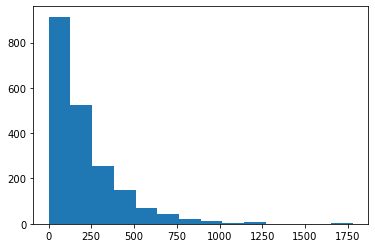

In [955]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

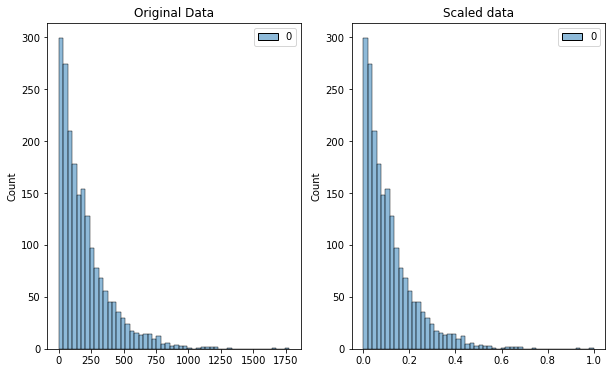

In [956]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

    Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method you will be using to normalize here is called the Normalizer method from sklearn. Let's take a quick peek at what normalizing some data looks like:

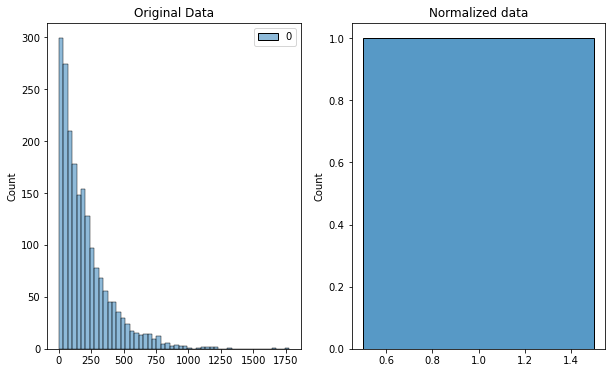

In [957]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [1231]:
# check datatypes
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148506 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL